## CSV
A CSV (Comma Separated Values) file is a text file in which a comma is used to separate values. Each line in the file represents a new record. The record consists of several fields separated by commas. The first line is often used to specify field names that are also comma separated. CSV files are a simple way to write structured data and are therefore often used in practice.

This exercise uses the sample file `data / estonia.csv` which is loaded using the` read_csv` function using the `pandas` library. Additional options for this feature may be available at [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

### Take note, in some exercises there are different types of solving the same exercise in different cells.

In [36]:
import pandas as pd
import numpy as np

In [73]:
df = pd.read_csv("estonia.csv", sep = ",")

What is the size of the dataframe 'estonia'?

In [38]:
df.shape

(742, 8)

What are the names of the columns of the dataset?

In [39]:
df.columns.values

array(['PassengerId', 'Country', 'Firstname', 'Lastname', 'Sex', 'Age',
       'Category', 'Survived'], dtype=object)

# Manipulating Pandas DataFrame data

Select columns 'Sex' and 'Age'.

In [40]:
df[["Sex", "Age"]]

Sex   Age
0     M  35.0
1     F  39.0
2     F  58.0
3     F  67.0
4     F  48.0
..   ..   ...
737   M  55.0
738   M  20.0
739   F  61.0
740   F  47.0
741   M  65.0

[742 rows x 2 columns]

How many children were in the plane?

In [41]:
df[df.Age < 18] #select passengers younger than 18
df[df.Age < 18].shape #view the count of passengers younger than 18

(16, 8)

Select passengers that are above 60 and male.

In [42]:
df[
    (df.Age > 60) &
    (df.Sex == 'M')
]

PassengerId  Country        Firstname  Lastname Sex   Age Category  \
13           103   Sweden   GUNNAR LENNART    BYLUND   M  69.0        P   
17           586   Sweden          LENNART    MOLLER   M  68.0        P   
19           445  Finland        EINO OLAV  LAAMANEN   M  61.0        P   
20             1   Sweden      ARVID KALLE     AADLI   M  62.0        P   
52           621   Sweden            ERICH    NURMIS   M  71.0        P   
..           ...      ...              ...       ...  ..   ...      ...   
690          109   Sweden       AKE HOLGER  CARLSSON   M  75.0        P   
696          357   Sweden  KARL ERIK ELIAS  KARLSSON   M  68.0        P   
711          581  Estonia            ELMAR    MANDLA   M  69.0        P   
732          869   Sweden   GUSTAF LENNART    THODEN   M  71.0        P   
741          741   Sweden    BERT REINESON      ROOS   M  65.0        P   

     Survived  
13          0  
17          0  
19          0  
20          0  
52          0  
..        ...  
690         0  
696         0  
711         0  
732         0  
741         1  

[73 rows x 8 columns]

In [43]:
df.loc[
    (df.Age > 60) &
    (df.Sex == 'M')
]

PassengerId  Country        Firstname  Lastname Sex   Age Category  \
13           103   Sweden   GUNNAR LENNART    BYLUND   M  69.0        P   
17           586   Sweden          LENNART    MOLLER   M  68.0        P   
19           445  Finland        EINO OLAV  LAAMANEN   M  61.0        P   
20             1   Sweden      ARVID KALLE     AADLI   M  62.0        P   
52           621   Sweden            ERICH    NURMIS   M  71.0        P   
..           ...      ...              ...       ...  ..   ...      ...   
690          109   Sweden       AKE HOLGER  CARLSSON   M  75.0        P   
696          357   Sweden  KARL ERIK ELIAS  KARLSSON   M  68.0        P   
711          581  Estonia            ELMAR    MANDLA   M  69.0        P   
732          869   Sweden   GUSTAF LENNART    THODEN   M  71.0        P   
741          741   Sweden    BERT REINESON      ROOS   M  65.0        P   

     Survived  
13          0  
17          0  
19          0  
20          0  
52          0  
..        ...  
690         0  
696         0  
711         0  
732         0  
741         1  

[73 rows x 8 columns]

Select only the survived column for the passengers from the previous excercise.

In [44]:
df[(df.Age > 60)&(df.Sex == 'M')]['Survived']

13     0
17     0
19     0
20     0
52     0
      ..
690    0
696    0
711    0
732    0
741    1
Name: Survived, Length: 73, dtype: int64

In [45]:
df.loc[(df.Age > 60)&(df.Sex == 'M'), 'Survived']

13     0
17     0
19     0
20     0
52     0
      ..
690    0
696    0
711    0
732    0
741    1
Name: Survived, Length: 73, dtype: int64

How many females and how many males are in the data set?

In [46]:
df.groupby('Sex').size()

Sex
F    382
M    360
dtype: int64

In [47]:
df.Sex.value_counts()

F    382
M    360
Name: Sex, dtype: int64

Show the entries for the first 2 rows of the dataset.

In [48]:
df.head(2)

PassengerId  Country        Firstname Lastname Sex   Age Category  Survived
0          694  Estonia           MARGUS  PUKSPUU   M  35.0        P         0
1          596   Sweden  BRITT MARGARETA  NILSSON   F  39.0        P         0

In [49]:
df.iloc[0:2,:]

PassengerId  Country        Firstname Lastname Sex   Age Category  Survived
0          694  Estonia           MARGUS  PUKSPUU   M  35.0        P         0
1          596   Sweden  BRITT MARGARETA  NILSSON   F  39.0        P         0

Which data types are there in this data set?

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  742 non-null    int64  
 1   Country      742 non-null    object 
 2   Firstname    742 non-null    object 
 3   Lastname     742 non-null    object 
 4   Sex          742 non-null    object 
 5   Age          705 non-null    float64
 6   Category     742 non-null    object 
 7   Survived     742 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 46.5+ KB


# Cleaning the data set.

Which columns have a unique value for each entry?

In [51]:
df.nunique()

PassengerId    741
Country         14
Firstname      660
Lastname       603
Sex              2
Age             78
Category         2
Survived         2
dtype: int64

Delete the column that gives no information to the data set.

In [52]:
df.drop(('PassengerId'), axis=1, inplace=True)
df.head()

Country        Firstname   Lastname Sex   Age Category  Survived
0  Estonia           MARGUS    PUKSPUU   M  35.0        P         0
1   Sweden  BRITT MARGARETA    NILSSON   F  39.0        P         0
2  Estonia              IVI    MATSALU   F  58.0        P         0
3   Sweden     BIRGIT MARIA  JAKOBSSON   F  67.0        P         0
4  Estonia           SAIDYA     KIVILA   F  48.0        C         0

In [53]:
#df = df.drop(['PassengerId'], axis = 1)

Check the set for missing data.

In [54]:
df.isna().sum()

Country       0
Firstname     0
Lastname      0
Sex           0
Age          37
Category      0
Survived      0
dtype: int64

How will you solve the missing data problem?

In [55]:
df_tmp = df.copy()

# insert mean value of age where this information is missing
df_tmp.loc[df_tmp.Age.isna(),'Age'] = df_tmp.loc[:,'Age'].mean() 


Which atributes are important for this dataset? Transform important 'string' atributes to 'integers'. Which encoding methods will you use?

In [56]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [57]:
# we define the encoder
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(df[['Country']])
# we transform the data
df_tmp = encoder.transform(df[['Country']])
df_tmp = pd.DataFrame(df_tmp.toarray(), columns=encoder.get_feature_names_out(['Country']))
df_tmp

Country_Belarus  Country_Canada  Country_Denmark  Country_Estonia  \
0                0.0             0.0              0.0              1.0   
1                0.0             0.0              0.0              0.0   
2                0.0             0.0              0.0              1.0   
3                0.0             0.0              0.0              0.0   
4                0.0             0.0              0.0              1.0   
..               ...             ...              ...              ...   
737              0.0             0.0              0.0              0.0   
738              0.0             0.0              0.0              1.0   
739              0.0             0.0              0.0              0.0   
740              0.0             0.0              0.0              0.0   
741              0.0             0.0              0.0              0.0   

     Country_Finland  Country_France  Country_Germany  Country_Great Britain  \
0                0.0             0.0              0.0                    0.0   
1                0.0             0.0              0.0                    0.0   
2                0.0             0.0              0.0                    0.0   
3                0.0             0.0              0.0                    0.0   
4                0.0             0.0              0.0                    0.0   
..               ...             ...              ...                    ...   
737              0.0             0.0              0.0                    0.0   
738              0.0             0.0              0.0                    0.0   
739              0.0             0.0              0.0                    0.0   
740              0.0             0.0              0.0                    0.0   
741              0.0             0.0              0.0                    0.0   

     Country_Latvia  Country_Lithuania  Country_Nigeria  Country_Norway  \
0               0.0                0.0              0.0             0.0   
1               0.0                0.0              0.0             0.0   
2               0.0                0.0              0.0             0.0   
3               0.0                0.0              0.0             0.0   
4               0.0                0.0              0.0             0.0   
..              ...                ...              ...             ...   
737             0.0                0.0              0.0             0.0   
738             0.0                0.0              0.0             0.0   
739             0.0                0.0              0.0             0.0   
740             0.0                0.0              0.0             0.0   
741             0.0                0.0              0.0             0.0   

     Country_Russia  Country_Sweden  
0               0.0             0.0  
1               0.0             1.0  
2               0.0             0.0  
3               0.0             1.0  
4               0.0             0.0  
..              ...             ...  
737             0.0             1.0  
738             0.0             0.0  
739             0.0             1.0  
740             0.0             1.0  
741             0.0             1.0  

[742 rows x 14 columns]

In [58]:
from sklearn.preprocessing  import LabelEncoder

le = LabelEncoder()

df["Sex"] = le.fit_transform(df.Sex)
df["Category"] = le.fit_transform(df.Category)
df["Country"] = le.fit_transform(df.Country)

Extra: how would you encode 'Age'?

In [59]:
df
df.loc[df.Age<18, "AgeBin"] = "Children"
df.loc[(df.Age>=18) & (df.Age<35), "AgeBin"] = "Young Adult"
df.loc[(df.Age>=35) & (df.Age<68), "AgeBin"] = "Adult"
df.loc[df.Age>68, "AgeBin"] = "Elder"

Find outliers in 'Age'.

In [60]:
import matplotlib.pyplot as plt

In [61]:
plt.boxplot(df.Age)

{'whiskers': [<matplotlib.lines.Line2D at 0x25beca5d890>,
 'caps': [<matplotlib.lines.Line2D at 0x25beca5ec10>,
 'boxes': [<matplotlib.lines.Line2D at 0x25beca5d050>],
 'medians': [<matplotlib.lines.Line2D at 0x25beca5fe10>],
 'fliers': [<matplotlib.lines.Line2D at 0x25beca48090>],
 'means': []}

# Visualisation

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

Plot the distribuiton of the age of the passengers.

In [63]:
plt.hist(df.Age, bins=100)
plt.show()

Show the mean and median of the age distribution.

In [64]:
plt.hist(df.Age, bins=30)
plt.axvline(df.Age.mean(), color = 'red', label = "mean")
plt.axvline(df.Age.median(), color = 'green', label = "median")
plt.xlabel('Age')
plt.legend()
plt.show()

Plot the distribution of age of the persons who survived or not.

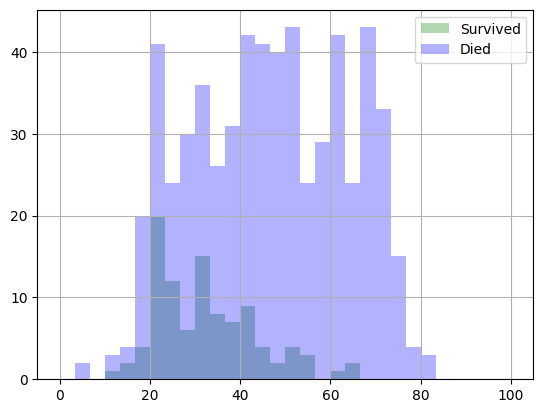

In [65]:
plt.hist(df[df.Survived == 1].Age, bins=30, range=(0,100), label='Survived', color='green', alpha=0.3)
plt.hist(df[df.Survived == 0].Age, bins=30, range=(0,100), label='Died', color='blue', alpha=0.3)
plt.legend(loc='best')
plt.grid()
plt.show()

Plot the percentage of the countries of origin. Show the names of countries and the percentages.

In [76]:
count_per_title = df.groupby('Country').count().loc[:,'Lastname'].values
country_name = df.groupby('Country').count().index.values
percent = (count_per_title/len(df))*100

plt.pie(percent, labels=country_name, autopct='%.2f')
plt.show()

Is there a better way to plot the data about the countries of origin?

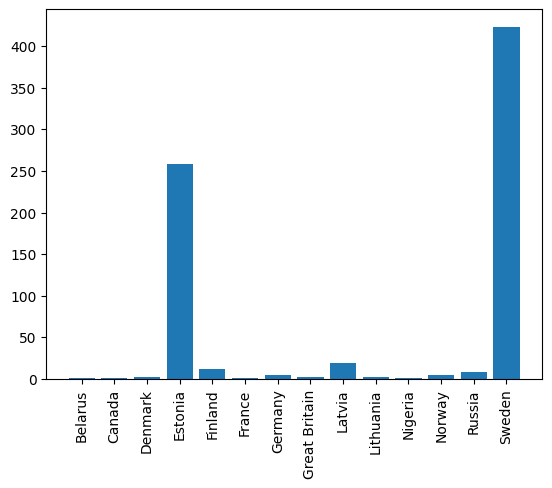

In [77]:
plt.bar(country_name, count_per_title)
plt.xticks(rotation=90)
plt.show()

In [68]:
X_tmp = df.copy()
sorted_age = X_tmp.sort_values(by=['Age']).Age.values[:30]
names = X_tmp.sort_values(by=['Age']).Firstname.values[:30]

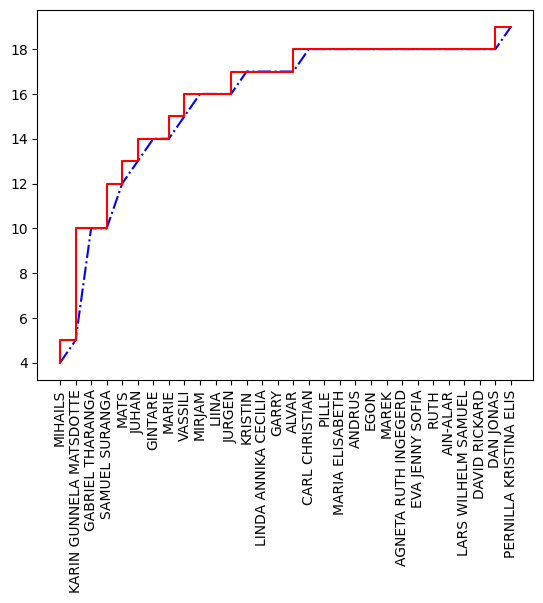

In [69]:
plt.plot(names, sorted_age, c='b', linestyle='-.')
plt.plot(names, sorted_age, c='r', ds='steps')
plt.xticks(rotation=90)
plt.show()